# `Sales Data Analysis and Cleaning on Order Level`

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')

In [2]:
data=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\Elevvo_Internship\Task-9\order level data.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,29.99,3504c0cb71d7fa48d967e0e4c94d59d9,8.72,2.0,voucher,1.0,38.71,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1.0,595fac2a385ac33a80bd5114aec74eb8,118.70,289cdb325fb7e7f891c38608bf9e0962,22.76,1.0,boleto,1.0,141.46,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1.0,aa4383b373c6aca5d8797843e5594415,159.90,4869f7a5dfa277a7dca6462dcf3b52b2,19.22,1.0,credit_card,3.0,179.12,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,45.00,66922902710d126a0e7d26b0e3805106,27.20,1.0,credit_card,1.0,72.20,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1.0,65266b2da20d04dbe00c5c2d3bb7859e,19.90,2c9e548be18521d1c43cde1c582c6de8,8.72,1.0,credit_card,1.0,28.62,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,stationery


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       99441 non-null  object 
 1   order_status                   99441 non-null  object 
 2   order_purchase_timestamp       99441 non-null  object 
 3   order_approved_at              99281 non-null  object 
 4   order_delivered_carrier_date   97658 non-null  object 
 5   order_delivered_customer_date  96476 non-null  object 
 6   order_estimated_delivery_date  99441 non-null  object 
 7   customer_unique_id             99441 non-null  object 
 8   customer_zip_code_prefix       99441 non-null  int64  
 9   customer_city                  99441 non-null  object 
 10  customer_state                 99441 non-null  object 
 11  order_item_id                  98666 non-null  float64
 12  product_id                     98666 non-null 

In [6]:
data.isnull().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
price                             775
seller_id                         775
freight_value                     775
payment_sequential                  1
payment_type                        1
payment_installments                1
payment_value                       1
product_photos_qty               2193
product_weight_g                  791
product_length_cm                 791
product_height_cm                 791
product_width_cm                  791
seller_zip_code_prefix            775
seller_city 

In [7]:
data.columns

Index(['order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'price', 'seller_id',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

### Cleaning of data

In [8]:
data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'])

In [9]:
data['order_approved_at']=pd.to_datetime(data['order_approved_at'])

In [10]:
data['order_delivered_carrier_date']=pd.to_datetime(data['order_delivered_carrier_date'])

In [11]:
data['order_delivered_customer_date']=pd.to_datetime(data['order_delivered_customer_date'])

In [12]:
data['order_estimated_delivery_date']=pd.to_datetime(data['order_estimated_delivery_date'])

In [13]:
data.rename(columns={'order_status':'status','order_purchase_timestamp':'purchase_date','order_approved_at':'approve_date','order_delivered_carrier_date':'delivered_carrier_date',
                     'order_delivered_customer_date':'delivered_customer_date','order_estimated_delivery_date':'estimated_delivery_date','customer_unique_id':'customer_id',
                     'customer_zip_code_prefix':'customer_zip','seller_zip_code_prefix':'seller_zip','product_category_name_english':'product_category'},inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   status                   99441 non-null  object        
 2   purchase_date            99441 non-null  datetime64[ns]
 3   approve_date             99281 non-null  datetime64[ns]
 4   delivered_carrier_date   97658 non-null  datetime64[ns]
 5   delivered_customer_date  96476 non-null  datetime64[ns]
 6   estimated_delivery_date  99441 non-null  datetime64[ns]
 7   customer_id              99441 non-null  object        
 8   customer_zip             99441 non-null  int64         
 9   customer_city            99441 non-null  object        
 10  customer_state           99441 non-null  object        
 11  order_item_id            98666 non-null  float64       
 12  product_id               98666 n

### Cleaning of data, and creating features if possible

In [15]:
def hour_classification(data):
    if (data>=6) & (data<12):
        return 'morning'
    elif (data>=12) & (data<18):
        return 'afternoon'
    elif (data>=18) & (data<24):
        return 'night'
    else:
        return 'midnight'

In [16]:
data['purchase_time']=data['purchase_date'].dt.hour.apply(hour_classification)

In [17]:
data['purchase_date']=pd.to_datetime(data['purchase_date'].dt.date)

In [18]:
data['approve_time']=data['approve_date'].dt.hour.apply(hour_classification)

In [19]:
data['approve_date']=pd.to_datetime(data['approve_date'].dt.date)

In [20]:
data['delivered_carrier_time']=data['delivered_carrier_date'].dt.hour.apply(hour_classification)

In [21]:
data['delivered_carrier_date']=pd.to_datetime(data['delivered_carrier_date'].dt.date)

In [22]:
data['delivered_customer_time']=data['delivered_customer_date'].dt.hour.apply(hour_classification)

In [23]:
data['delivered_customer_date']=pd.to_datetime(data['delivered_customer_date'].dt.date)

In [24]:
data.columns

Index(['order_id', 'status', 'purchase_date', 'approve_date',
       'delivered_carrier_date', 'delivered_customer_date',
       'estimated_delivery_date', 'customer_id', 'customer_zip',
       'customer_city', 'customer_state', 'order_item_id', 'product_id',
       'price', 'seller_id', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip', 'seller_city',
       'seller_state', 'product_category', 'purchase_time', 'approve_time',
       'delivered_carrier_time', 'delivered_customer_time'],
      dtype='object')

In [25]:
data.drop(columns=['product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm'],inplace=True)

### Univariate analysis

**Order ID**

In [26]:
data['order_id'].value_counts()[data['order_id'].value_counts()>1]

Series([], Name: count, dtype: int64)

`There are no duplicate orders`

In [27]:
data['order_id'].nunique()

99441

`There are 99441 number of unique orders`

**Status**

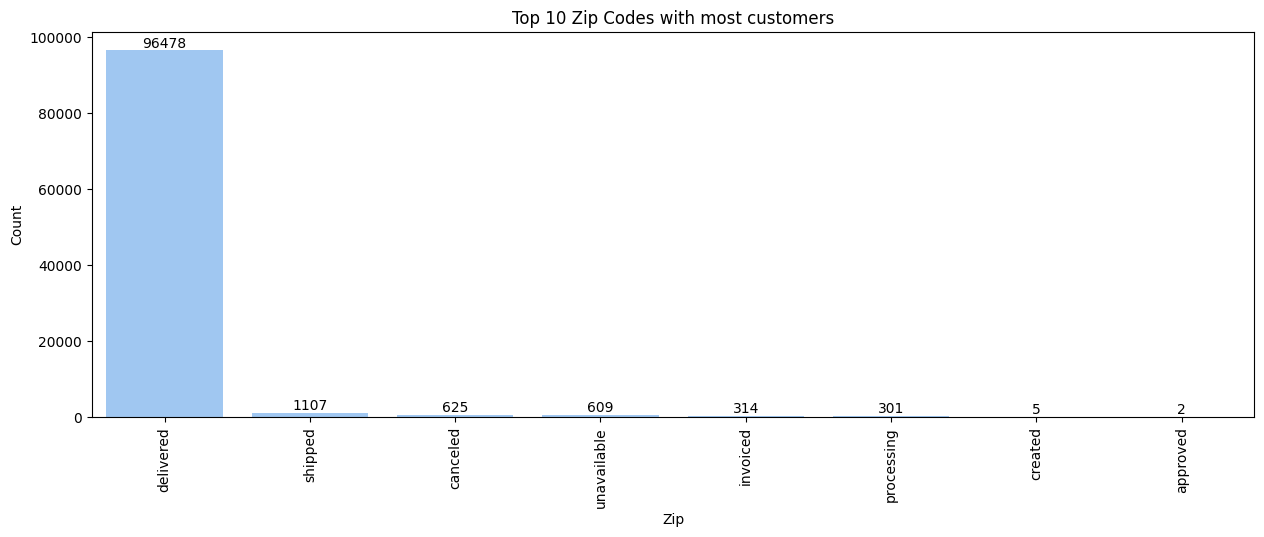

In [28]:
most_popular_statuss=pd.DataFrame(data['status'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_statuss['status'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='status',y='count',data=most_popular_statuss,order=order)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Zip')
plt.ylabel('Count')
plt.title('Top 10 Zip Codes with most customers')
plt.show()

`There are 8 unique values for status`

In [29]:
data[data['status']=='unavailable']

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
266,8e24261a7e58791d10cb1bf9da94df5c,unavailable,2017-11-16,2017-11-16,NaT,NaT,2017-12-05,41fc647b8c6bd979b1b6364b60471b50,89288,sao bento do sul,SC,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,5.0,84.00,NaN,NaN,NaN,NaN,afternoon,afternoon,midnight,midnight
586,c272bcd21c287498b4883c7512019702,unavailable,2018-01-31,2018-01-31,NaT,NaT,2018-02-16,0e634b16e4c585acbd7b2e8276ce6677,11701,praia grande,SP,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,1.0,97.68,NaN,NaN,NaN,NaN,morning,afternoon,midnight,midnight
687,37553832a3a89c9b2db59701c357ca67,unavailable,2017-08-14,2017-08-17,NaT,NaT,2017-09-05,596ed6d7a35890b3fbac54ec01f69685,2318,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,132.46,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
737,d57e15fb07fd180f06ab3926b39edcd2,unavailable,2018-01-08,2018-01-09,NaT,NaT,2018-02-06,2349bbb558908e0955e98d47dacb7adb,48607,paulo afonso,BA,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,134.38,NaN,NaN,NaN,NaN,night,morning,midnight,midnight
1160,2f634e2cebf8c0283e7ef0989f77d217,unavailable,2017-09-27,2017-09-28,NaT,NaT,2017-10-27,21c933c8dd97d088e64c50988c90ccf5,5017,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,12.0,615.53,NaN,NaN,NaN,NaN,night,midnight,midnight,midnight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,unavailable,2017-10-17,2017-10-19,NaT,NaT,2017-10-27,9004096d8ffc515d4189e661fc4bcb84,3759,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,131.78,NaN,NaN,NaN,NaN,morning,midnight,midnight,midnight
99233,1c7c8ab324927f5b6e52338bd110bef4,unavailable,2017-12-23,2017-12-23,NaT,NaT,2018-01-19,0aa3b096dc796c251f9b36a822051ed6,14750,pitangueiras,SP,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,3.0,934.09,NaN,NaN,NaN,NaN,night,night,midnight,midnight
99252,aaab15da689073f8f9aa978a390a69d1,unavailable,2018-01-16,2018-01-17,NaT,NaT,2018-02-06,a33e0969408919ba06779f497ead93ec,7025,guarulhos,SP,NaN,NaN,NaN,NaN,NaN,1.0,boleto,1.0,210.09,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
99348,a69ba794cc7deb415c3e15a0a3877e69,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15,e72a90a2b29fe1a8795b284aaaa3246f,22723,rio de janeiro,RJ,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,2.0,195.91,NaN,NaN,NaN,NaN,afternoon,afternoon,midnight,midnight


**Purchase Date**

In [30]:
data['purchase_date'].describe()

count                            99441
mean     2017-12-30 17:26:56.616888320
min                2016-09-04 00:00:00
25%                2017-09-12 00:00:00
50%                2018-01-18 00:00:00
75%                2018-05-04 00:00:00
max                2018-10-17 00:00:00
Name: purchase_date, dtype: object

`Approx 2 years of purchase history is available`

In [31]:
(data['purchase_date'].max()-data['purchase_date'].min()).days/365

2.117808219178082

In [32]:
data['purchase_date'].value_counts().mean()

np.float64(156.84700315457414)

`On Avarage 150 orders are placed each day`

**Approve Date**

In [33]:
data['approve_date'].describe()

count                            99281
mean     2017-12-31 05:20:33.553248256
min                2016-09-15 00:00:00
25%                2017-09-12 00:00:00
50%                2018-01-19 00:00:00
75%                2018-05-04 00:00:00
max                2018-09-03 00:00:00
Name: approve_date, dtype: object

`There are 160 Orders which was not approved`

In [34]:
(data['approve_date']-data['purchase_date']).mean()

Timedelta('0 days 12:26:39.097511104')

`Orders Typically gets approved within 12 Hours of placing`

**Delivered Carrier Date**

In [35]:
data['delivered_carrier_date'].describe()

count                            97658
mean     2018-01-04 06:13:53.848737536
min                2016-10-08 00:00:00
25%                2017-09-15 00:00:00
50%                2018-01-24 00:00:00
75%                2018-05-08 00:00:00
max                2018-09-11 00:00:00
Name: delivered_carrier_date, dtype: object

`There were 1623 orders still remained to handed over to the carrier, which was approved`

In [36]:
(data['delivered_carrier_date']-data['approve_date']).mean()

Timedelta('2 days 16:58:21.339560034')

`It typically takes 2 days for order to get to the carrier`

**Delivered Customer Date**

In [37]:
data['delivered_customer_date'].describe()

count                            96476
mean     2018-01-13 19:24:32.449106432
min                2016-10-11 00:00:00
25%                2017-09-25 00:00:00
50%                2018-02-02 00:00:00
75%                2018-05-15 00:00:00
max                2018-10-17 00:00:00
Name: delivered_customer_date, dtype: object

`There were 1182 products which were still in carrier, waiting for delivered to the customer`

In [38]:
(data['delivered_customer_date']-data['delivered_carrier_date']).mean()

Timedelta('9 days 06:47:12.012438455')

In [39]:
(data['delivered_customer_date']-data['delivered_carrier_date']).median()

Timedelta('7 days 00:00:00')

`Orders generally takes 1 week to reach to its owner after coming to the carrier`

In [40]:
(data['delivered_customer_date']-data['purchase_date']).mean()

Timedelta('12 days 11:56:09.841204030')

`Orders generally takes 12-14 days to reach to its owner after purchasing`

**Estimate Delivery Date**

In [41]:
data['estimated_delivery_date'].describe()

count                            99441
mean     2018-01-24 03:08:37.730111232
min                2016-09-30 00:00:00
25%                2017-10-03 00:00:00
50%                2018-02-15 00:00:00
75%                2018-05-25 00:00:00
max                2018-11-12 00:00:00
Name: estimated_delivery_date, dtype: object

In [42]:
data['estimated_delivery_date'].dt.day.mean()

np.float64(15.715288462505406)

`Company estimates to deliver items on avarage 15 days`

**Customer ID**

In [43]:
data['customer_id'].nunique()

96096

`There are 96096 customers who had ordered something`

In [44]:
pd.DataFrame(data['customer_id'].value_counts().reset_index().head(10))

,customer_id,count
0,8d50f5eadf50201ccdcedfb9e2ac8455,17
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,ca77025e7201e3b30c44b472ff346268,7
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7
5,f0e310a6839dce9de1638e0fe5ab282a,6
6,12f5d6e1cbf93dafd9dcc19095df0b3d,6
7,dc813062e0fc23409cd255f7f53c7074,6
8,47c1a3033b8b77b3ab6e109eb4d5fdf3,6
9,de34b16117594161a6a89c50b289d35a,6


`Top 10 customers with most number or orders`

**Customer ZIP**

In [45]:
pd.DataFrame(data['customer_zip'].value_counts().sort_values(ascending=False).reset_index().head(10))

,customer_zip,count
0,22790,142
1,24220,124
2,22793,121
3,24230,117
4,22775,110
5,29101,101
6,13212,95
7,35162,93
8,22631,89
9,38400,87


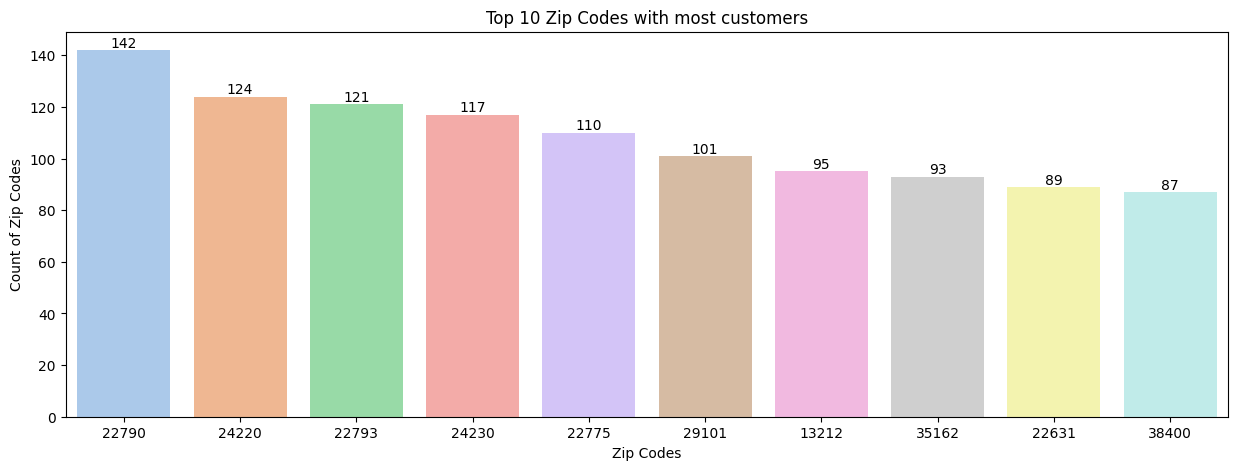

In [46]:
most_popular_customer_zips=pd.DataFrame(data['customer_zip'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_zips['customer_zip'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='customer_zip',y='count',data=most_popular_customer_zips,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Zip Codes')
plt.ylabel('Count of Zip Codes')
plt.title('Top 10 Zip Codes with most customers')
plt.show()

`Top 10 zip codes with most customers who have ordered something`

**Customer City**

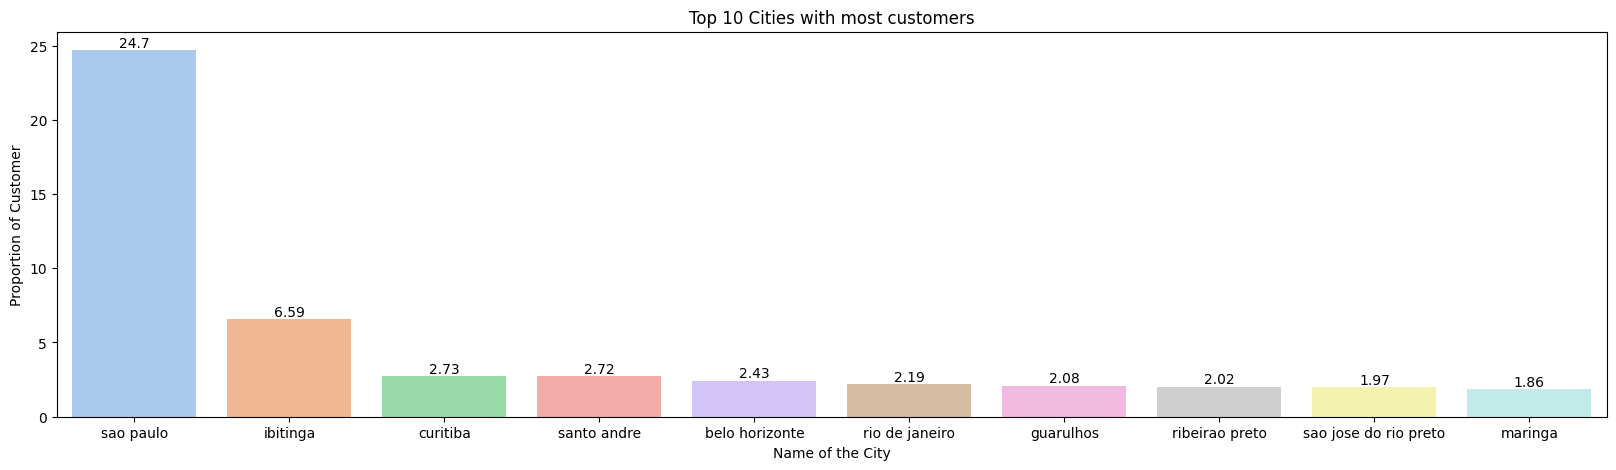

In [47]:
most_popular_customer_cities=pd.DataFrame(((data['seller_city'].value_counts(normalize=True)*100).round(2)).sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_cities['seller_city'].value_counts().index
plt.figure(figsize=(20,5))
ax=sns.barplot(x='seller_city',y='proportion',data=most_popular_customer_cities,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Name of the City')
plt.ylabel('Proportion of Customer')
plt.title('Top 10 Cities with most customers')
plt.show()

`Top 10 Cities with most customers who have ordered`

**Customer State**

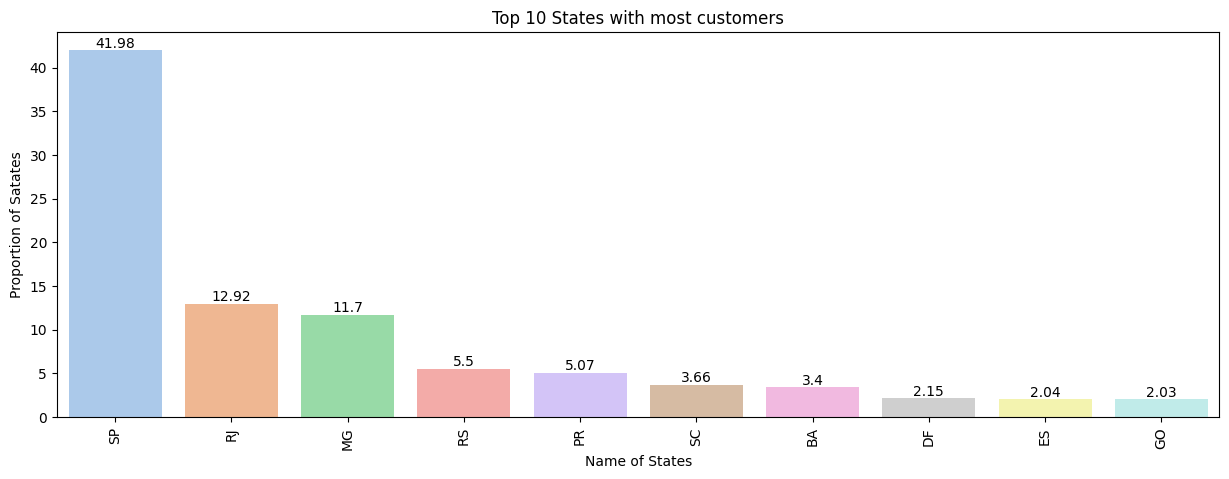

In [48]:
most_popular_customer_states=pd.DataFrame(((data['customer_state'].value_counts(normalize=True)*100).round(2)).sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_states['customer_state'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='customer_state',y='proportion',data=most_popular_customer_states,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Name of States')
plt.ylabel('Proportion of Satates')
plt.title('Top 10 States with most customers')
plt.show()

`States with the most customers who have ordered`

**Order Item ID**

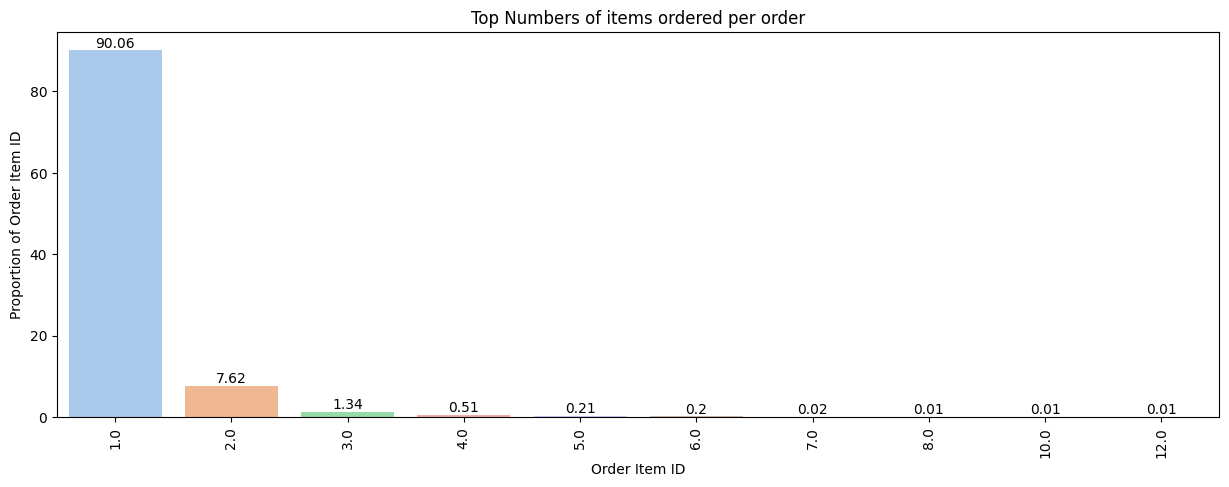

In [49]:
most_popular_order_item_id=pd.DataFrame(((data['order_item_id'].value_counts(normalize=True)*100).round(2)).sort_values(ascending=False).reset_index().head(10))
order=most_popular_order_item_id['order_item_id'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='order_item_id',y='proportion',data=most_popular_order_item_id,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Order Item ID')
plt.ylabel('Proportion of Order Item ID')
plt.title('Top Numbers of items ordered per order')
plt.show()

`Most number or items per order`

**Product ID**

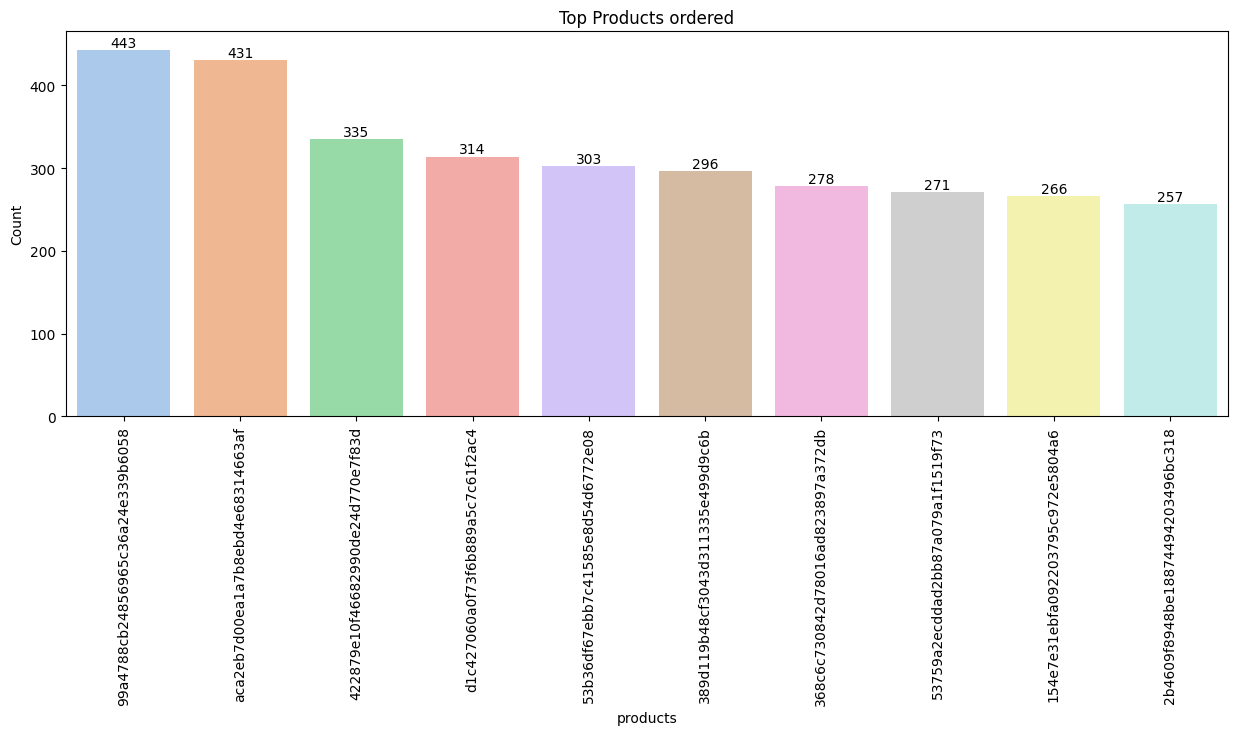

In [50]:
most_popular_products=pd.DataFrame(data['product_id'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_products['product_id'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='product_id',y='count',data=most_popular_products,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('products')
plt.ylabel('Count')
plt.title('Top Products ordered')
plt.show()

`Top 10 Products`

**Price**

In [51]:
data['price'].describe()

count    98666.000000
mean       137.754076
std        210.645145
min          0.850000
25%         45.900000
50%         86.900000
75%        149.900000
max      13440.000000
Name: price, dtype: float64

In [52]:
data['price'].quantile(.99)

np.float64(998.9)

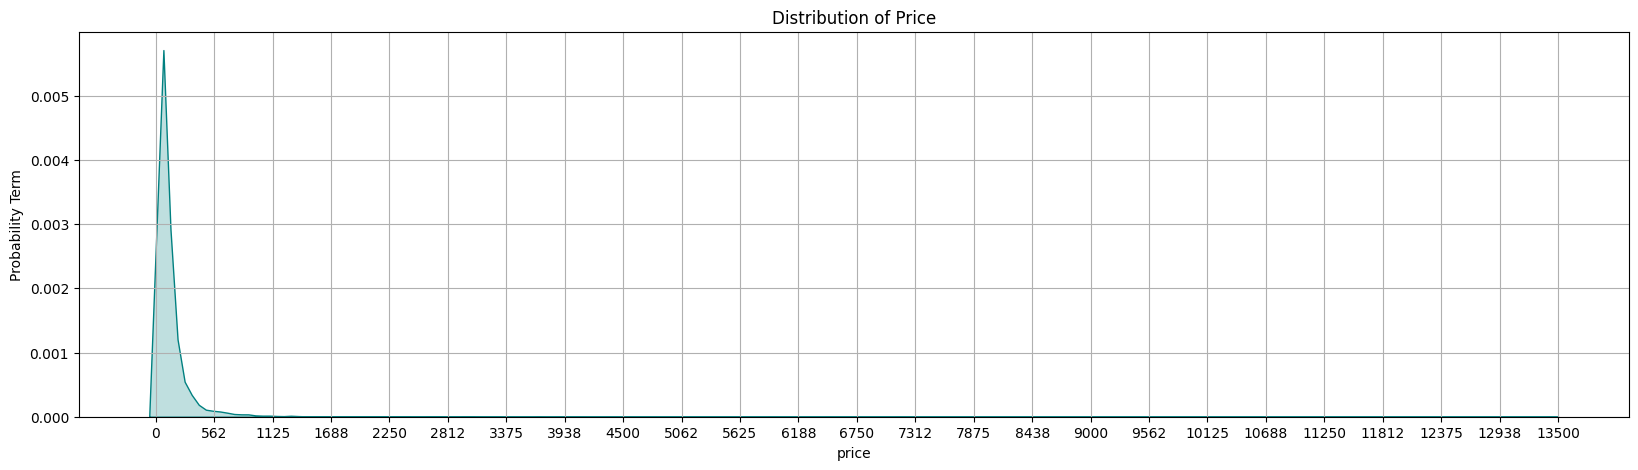

In [53]:
plt.figure(figsize=(20,5))
sns.kdeplot(data['price'],color='teal',fill=True)
plt.grid(True)
plt.xticks(np.linspace(0,13500,25))
plt.title("Distribution of Price")
plt.ylabel('Probability Term')
plt.xlabel('price')
plt.show()

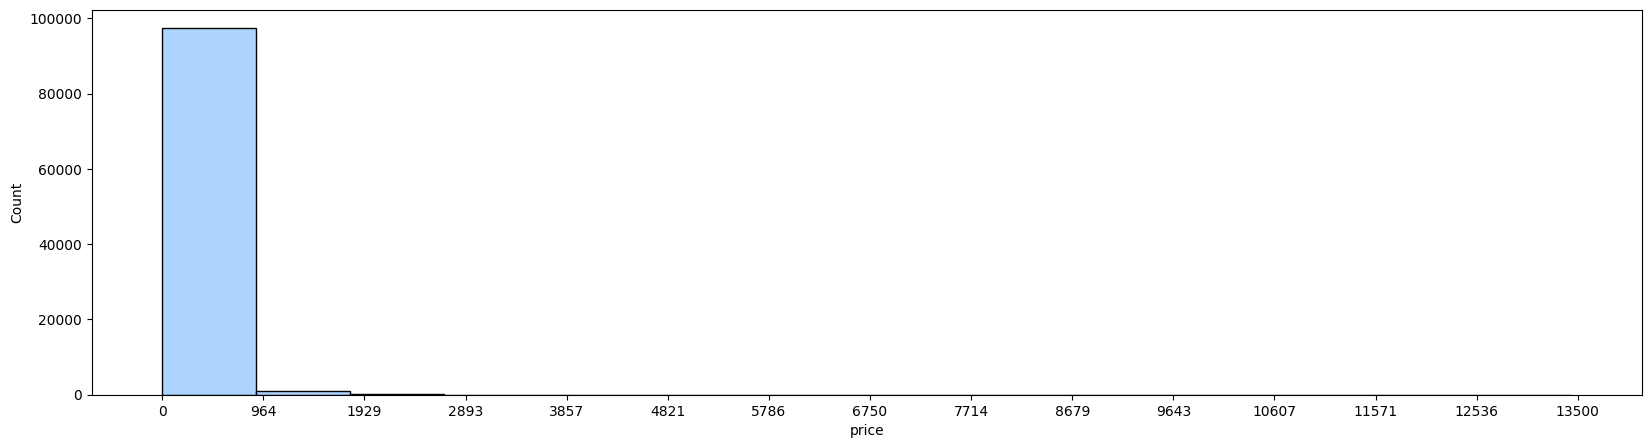

In [54]:
plt.figure(figsize=(20,5))
sns.histplot(data['price'],bins=15)
plt.xticks(np.linspace(0,13500,15))
plt.show()

`99 Percentile price values falls under 1000`

**Seller ID**

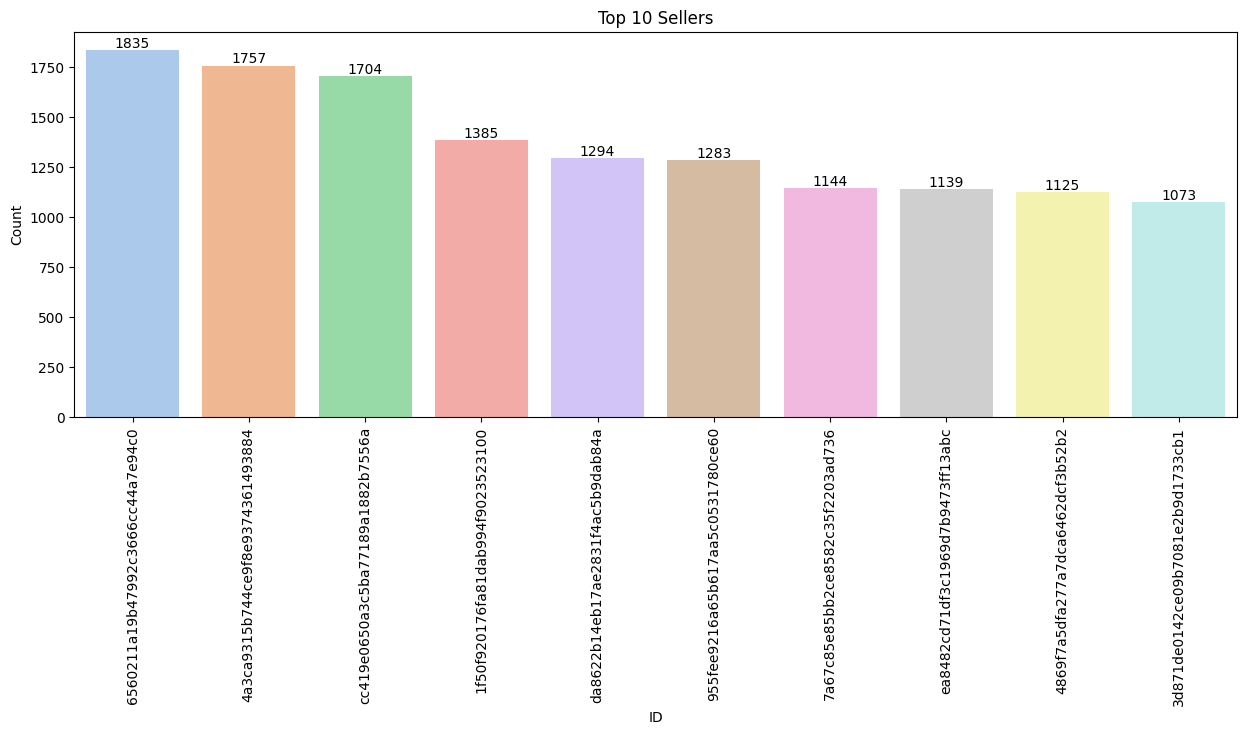

In [55]:
most_popular_seller_id=pd.DataFrame(data['seller_id'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_seller_id['seller_id'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='seller_id',y='count',data=most_popular_seller_id,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('ID')
plt.ylabel('Count')
plt.title('Top 10 Sellers')
plt.show()

**Freight Value**

In [56]:
data['freight_value'].describe()

count    98666.000000
mean        22.823562
std         21.650909
min          0.000000
25%         13.850000
50%         17.170000
75%         24.040000
max       1794.960000
Name: freight_value, dtype: float64

In [57]:
data['freight_value'].quantile(.99)

np.float64(104.98350000000006)

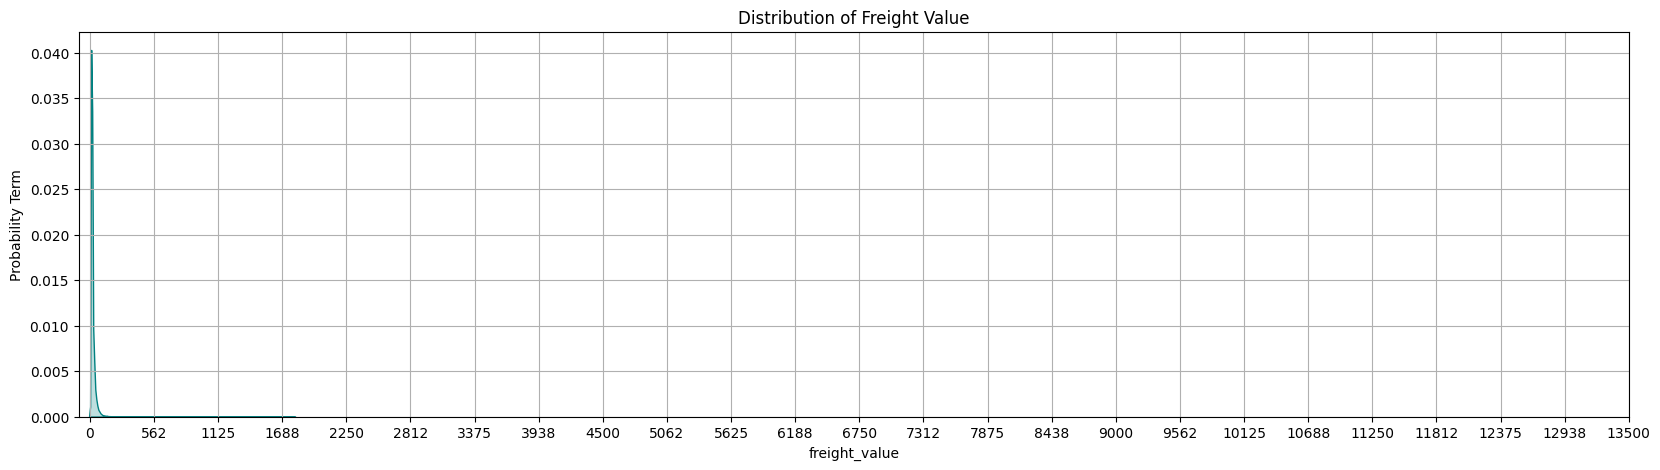

In [58]:
plt.figure(figsize=(20,5))
sns.kdeplot(data['freight_value'],color='teal',fill=True)
plt.grid(True)
plt.xticks(np.linspace(0,13500,25))
plt.title('Distribution of Freight Value')
plt.ylabel('Probability Term')
plt.xlabel('freight_value')
plt.show()

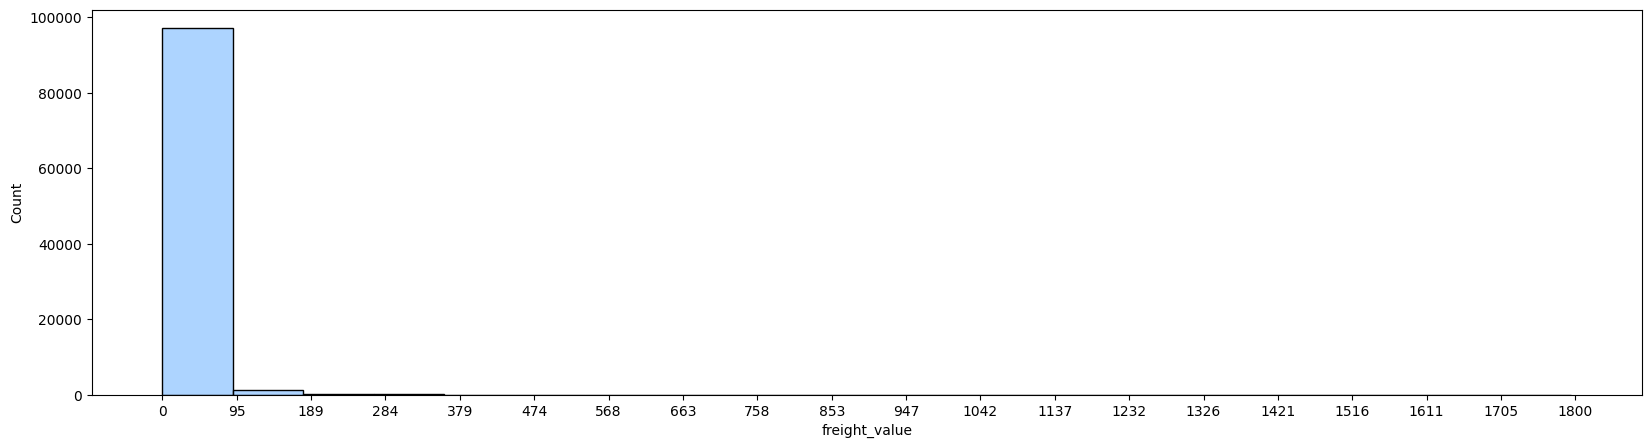

In [59]:
plt.figure(figsize=(20,5))
sns.histplot(data['freight_value'],bins=20)
plt.xticks(np.linspace(0,1800,20))
plt.show()

`Most of the freight values are lower than 100`

**Payment Sequentional**

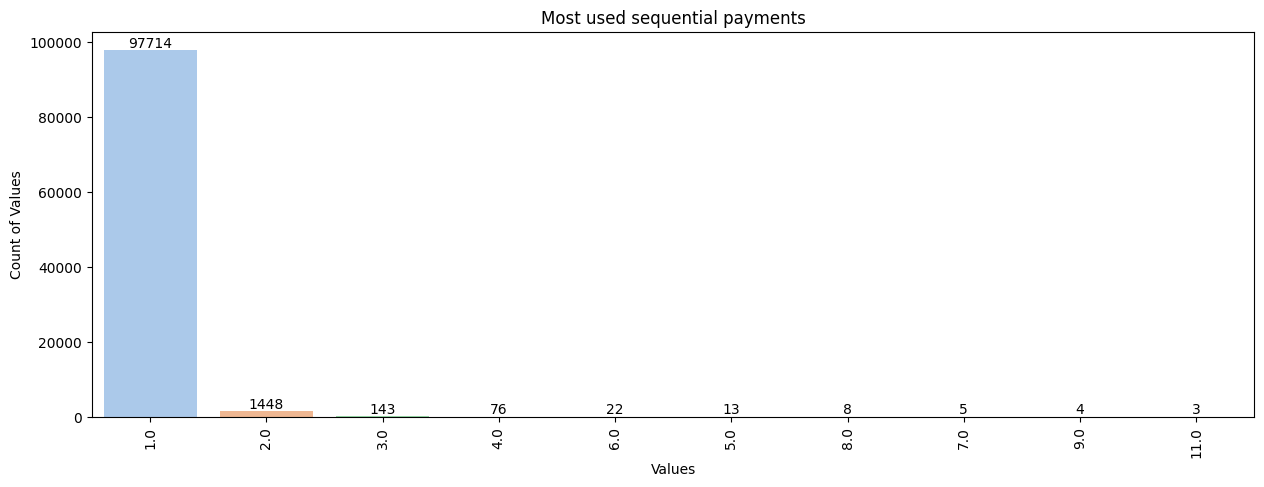

In [60]:
most_popular_payment_sequential=pd.DataFrame(data['payment_sequential'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_payment_sequential['payment_sequential'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='payment_sequential',y='count',data=most_popular_payment_sequential,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.ylabel('Count of Values')
plt.title('Most used sequential payments')
plt.show()

`People are used to pay in one go`

**Payment Types**

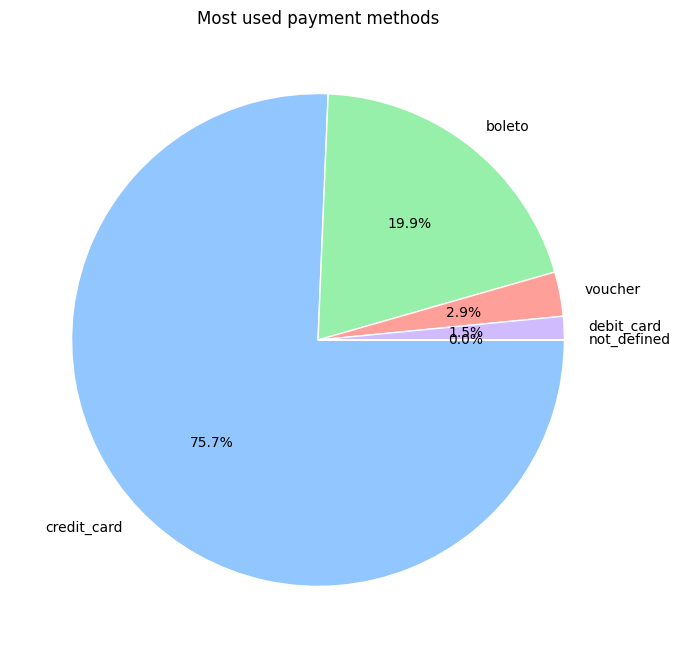

In [61]:
payment_types=data['payment_type'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(payment_types,labels=payment_types.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most used payment methods')
plt.show()

`Most people uses credit card as payment method`

In [62]:
data['payment_type'].unique()

array(['voucher', 'boleto', 'credit_card', 'debit_card', 'not_defined',
       nan], dtype=object)

In [63]:
data[data['payment_type']=='not_defined']

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
39919,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03,NaT,NaT,NaT,2018-09-10,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
40235,c8c528189310eaa44a745b8d9d26908b,canceled,2018-08-28,NaT,NaT,NaT,2018-09-11,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,night,midnight,midnight,midnight


`Undefined payment types are cancelled orders`

**Payment Installments**

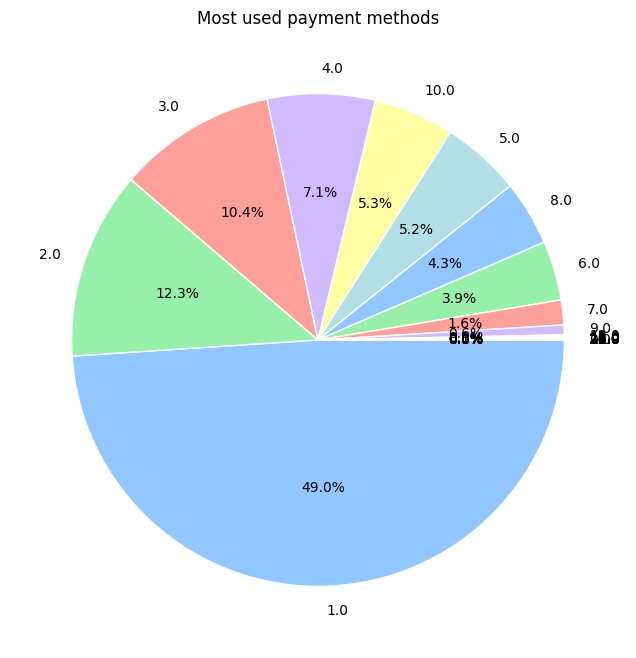

In [64]:
payment_installments=data['payment_installments'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(payment_installments,labels=payment_installments.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most used payment methods')
plt.show()

`Half of the users dont use installments`

**Payment Value**

In [65]:
data['payment_value'].describe()

count    99440.000000
mean       160.990267
std        221.951257
min          0.000000
25%         62.010000
50%        105.290000
75%        176.970000
max      13664.080000
Name: payment_value, dtype: float64

In [66]:
data[data['payment_value']==0]

,order_id,status,purchase_date,approve_date,delivered_carrier_date,delivered_customer_date,estimated_delivery_date,customer_id,customer_zip,customer_city,customer_state,order_item_id,product_id,price,seller_id,freight_value,payment_sequential,payment_type,payment_installments,payment_value,seller_zip,seller_city,seller_state,product_category,purchase_time,approve_time,delivered_carrier_time,delivered_customer_time
1130,00b1cb0320190ca0daa2c88b35206009,canceled,2018-08-28,NaT,NaT,NaT,2018-09-12,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
39919,4637ca194b6387e2d538dc89b124b0ee,canceled,2018-09-03,NaT,NaT,NaT,2018-09-10,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,afternoon,midnight,midnight,midnight
40235,c8c528189310eaa44a745b8d9d26908b,canceled,2018-08-28,NaT,NaT,NaT,2018-09-11,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,NaN,NaN,NaN,NaN,NaN,1.0,not_defined,1.0,0.0,NaN,NaN,NaN,NaN,night,midnight,midnight,midnight


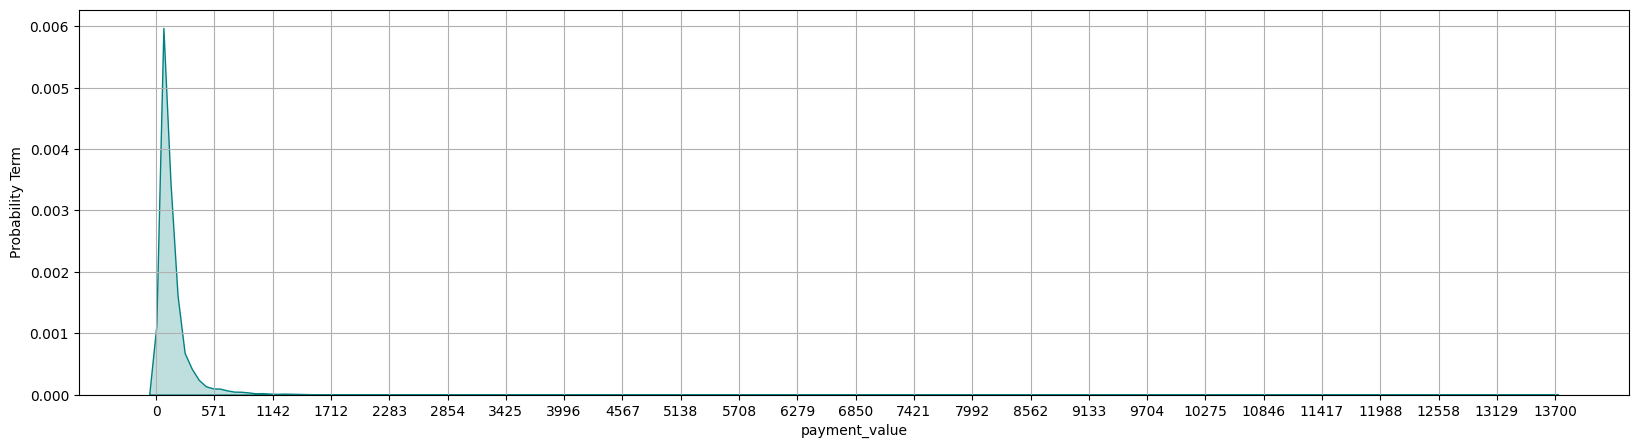

In [67]:
plt.figure(figsize=(20,5))
sns.kdeplot(data['payment_value'],color='teal',fill=True)
plt.grid(True)
plt.xticks(np.linspace(0,13700,25))
plt.ylabel('Probability Term')
plt.xlabel('payment_value')
plt.show()

`Order values are less so the price values`

**Seller City**

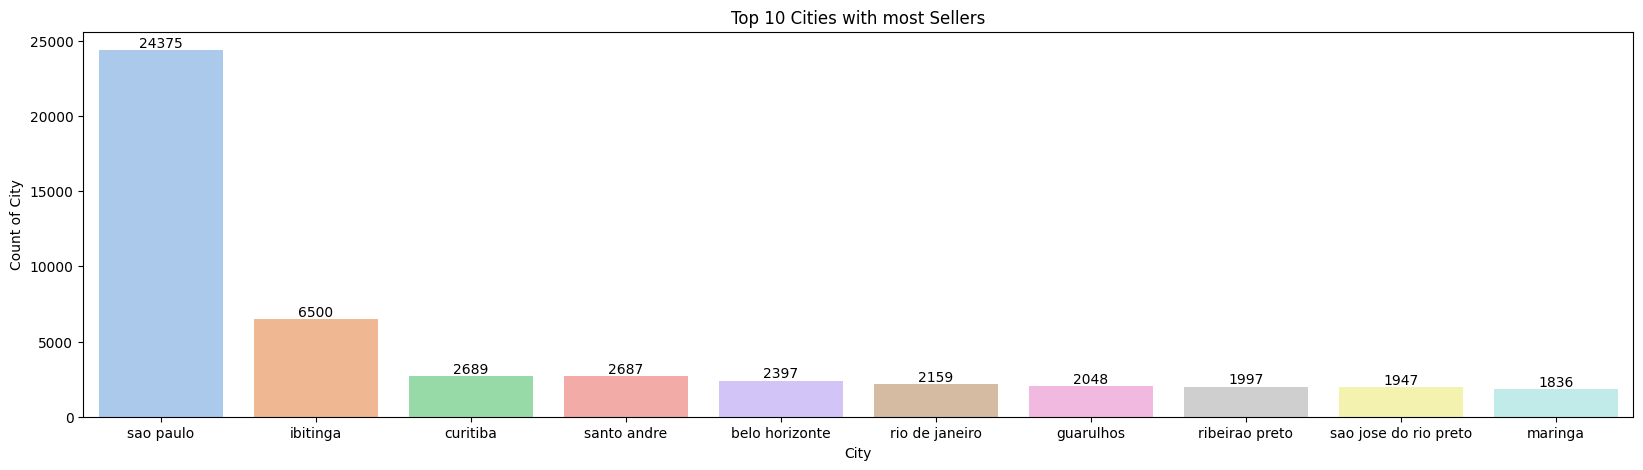

In [68]:
most_popular_customer_cities=pd.DataFrame(data['seller_city'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_cities['seller_city'].value_counts().index
plt.figure(figsize=(20,5))
ax=sns.barplot(x='seller_city',y='count',data=most_popular_customer_cities,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('City')
plt.ylabel('Count of City')
plt.title('Top 10 Cities with most Sellers')
plt.show()

`Top 10 Cities with most sellers`

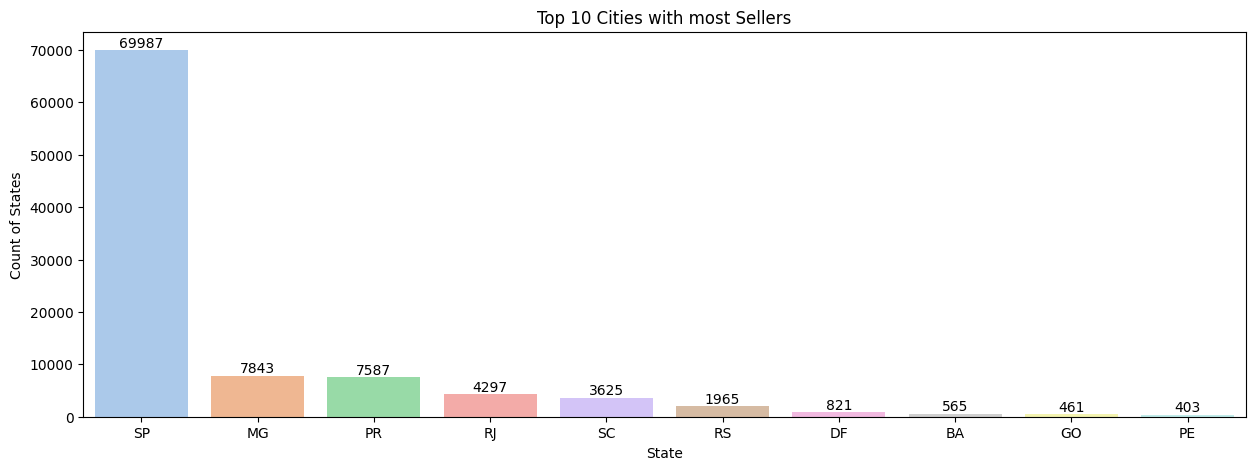

In [69]:
most_popular_customer_cities=pd.DataFrame(data['seller_state'].value_counts().sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_cities['seller_state'].value_counts().index
plt.figure(figsize=(15,5))
ax=sns.barplot(x='seller_state',y='count',data=most_popular_customer_cities,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('State')
plt.ylabel('Count of States')
plt.title('Top 10 Cities with most Sellers')
plt.show()

`Top 10 states with most sellers`

**Product Category**

In [70]:
data['product_category'].nunique()

71

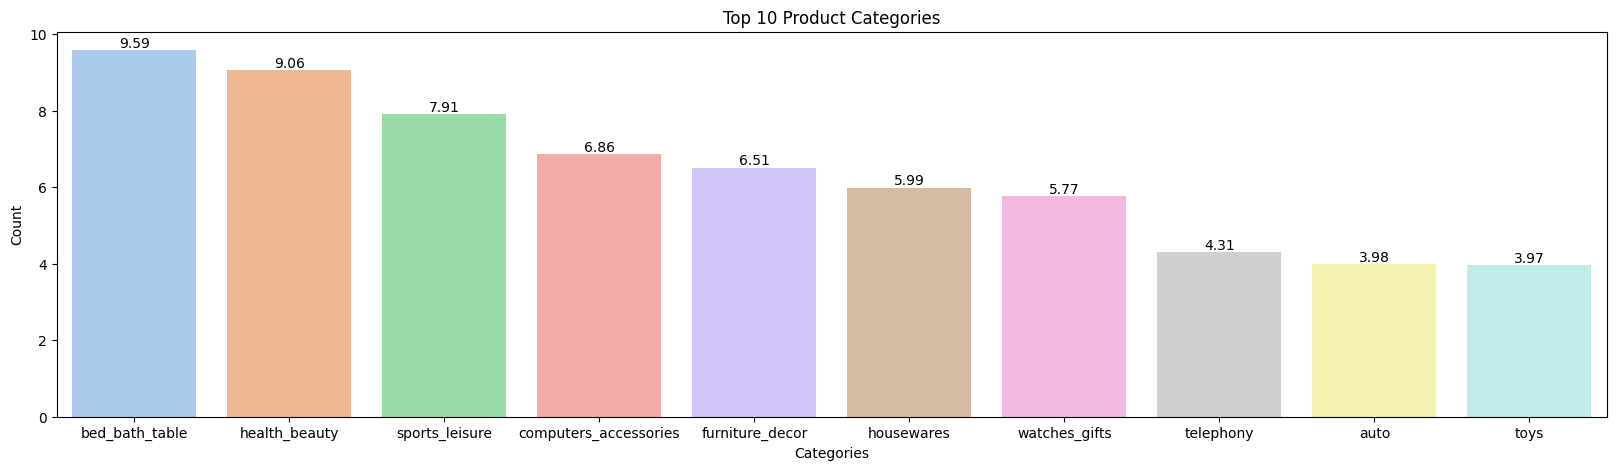

In [71]:
most_popular_customer_cities=pd.DataFrame(((data['product_category'].value_counts(normalize=True)*100).round(2)).sort_values(ascending=False).reset_index().head(10))
order=most_popular_customer_cities['product_category'].value_counts().index
plt.figure(figsize=(20,5))
ax=sns.barplot(x='product_category',y='proportion',data=most_popular_customer_cities,order=order,palette='pastel')
for container in ax.containers:
    ax.bar_label(container)
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Top 10 Product Categories')
plt.show()

`Top 10 Product Categories`

**Purchase Time**

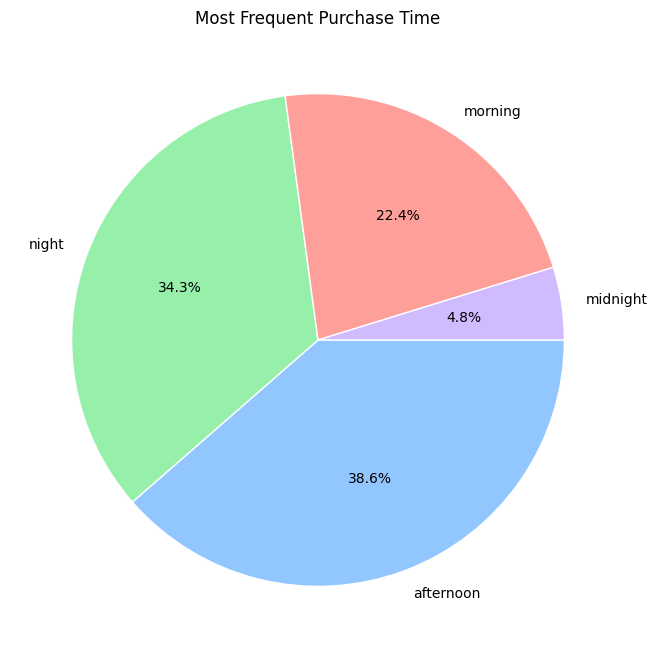

In [72]:
purchase_time=data['purchase_time'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(purchase_time,labels=purchase_time.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most Frequent Purchase Time')
plt.show()

`Most people orders from 12 pm to 12 am`

**Approve Time**

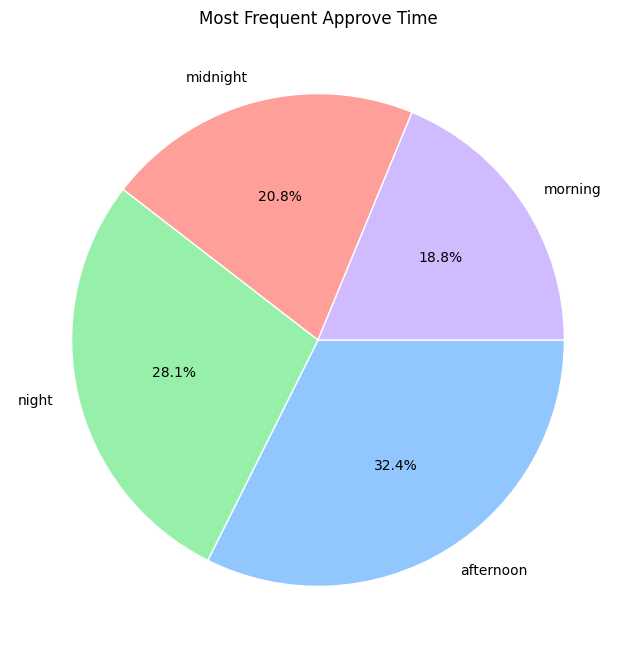

In [73]:
approve_time=data['approve_time'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(approve_time,labels=approve_time.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most Frequent Approve Time')
plt.show()

`Orders are getting approved all the time throughout a day`

**Delivered Carrier Time**

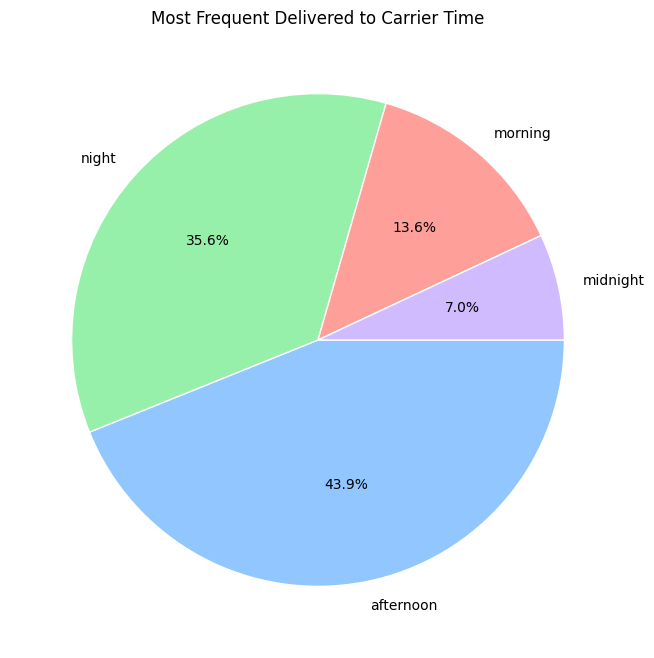

In [74]:
delivered_carrier_time=data['delivered_carrier_time'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(delivered_carrier_time,labels=delivered_carrier_time.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most Frequent Delivered to Carrier Time')
plt.show()

`Orders are reaching careers mostly from 12 pm to 12 am`

**Delivered Customer Time**

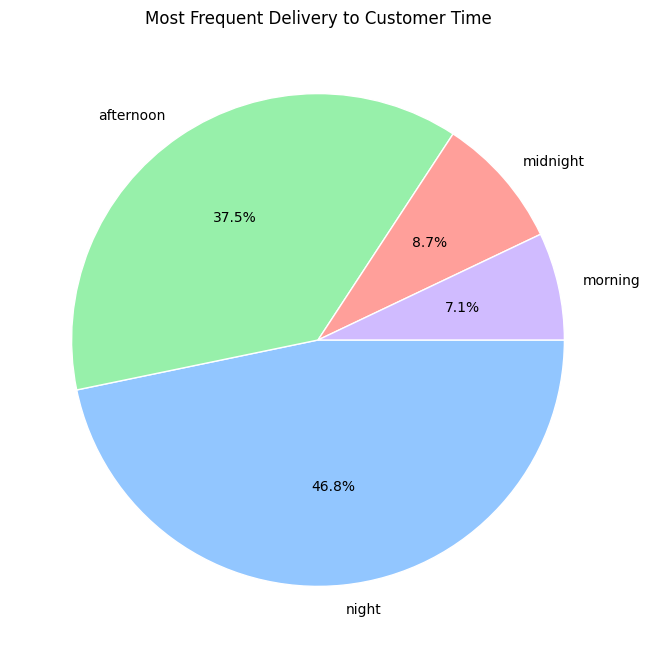

In [75]:
delivered_customer_time=data['delivered_customer_time'].value_counts(normalize=True)
plt.figure(figsize=(8,8))
plt.pie(delivered_customer_time,labels=delivered_customer_time.index,autopct="%.1f%%",counterclock=False,wedgeprops={'edgecolor':'white'})
plt.title('Most Frequent Delivery to Customer Time')
plt.show()

`Same goes with the delivery time to the customer`

### Bivariate Analysis - Order Level

`ID -> order_id || customer_id || seller_id || product_id`

`Categorical -> status || customer_zip || customer_city || customer_state || order_item_id || payment_sequential || payment_type || payment_installments || `
`seller_zip || seller_city || seller_state || product_category`

`Numerical -> price || freight_value || payment_value`

`Date -> purchase_date || approve_date || delivered_customer_date || delivered_carrier_date || estimated_delivery_date || purchase_time || `
`approve_time || delivered_customer_time || delivered_carrier_time || first_purchase_date || customer_type`

### `Categorical VS Categorical`

In [ ]:
payment_counts=data.groupby(['payment_type','status']).size().reset_index(name='count')
payment_counts

,payment_type,status,count
0,boleto,canceled,95
1,boleto,created,2
2,boleto,delivered,19191
3,boleto,invoiced,67
4,boleto,processing,70
5,boleto,shipped,209
6,boleto,unavailable,150
7,credit_card,approved,2
8,credit_card,canceled,436
9,credit_card,created,3


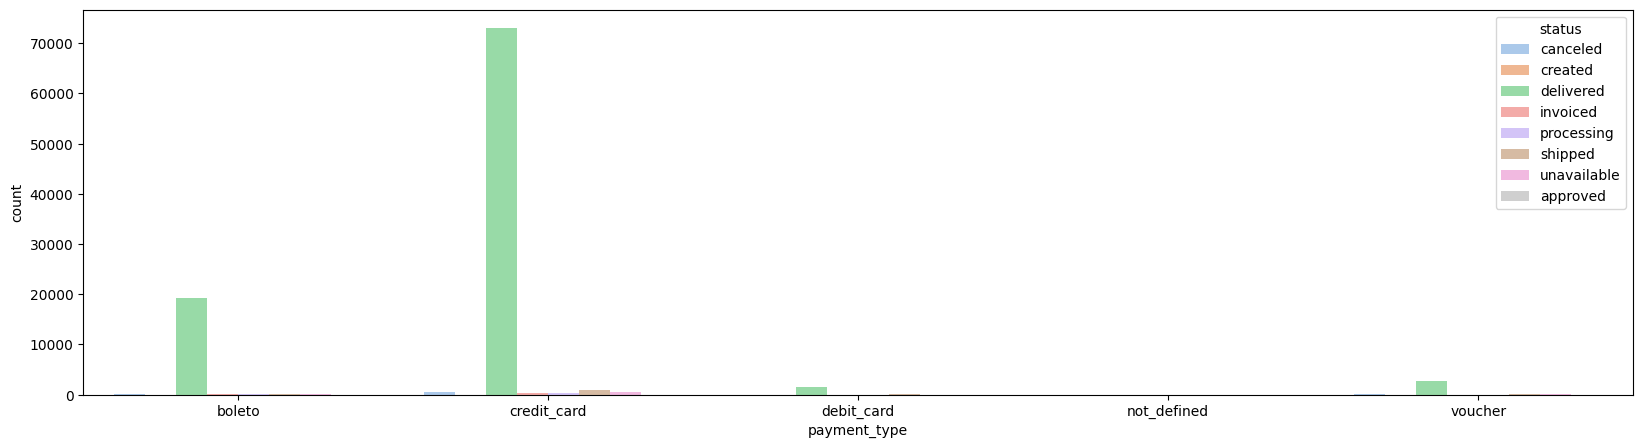

In [110]:
payment_counts=data.groupby(['payment_type','status']).size().reset_index(name='count')
plt.figure(figsize=(20,5))
sns.barplot(data=payment_counts,x='payment_type',y='count',hue='status',palette='pastel')
plt.show()